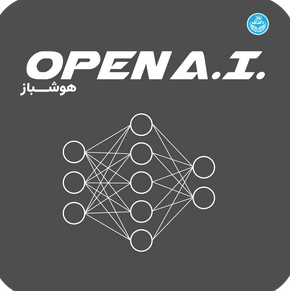

<!-- <img src="../assets/logo3.png" width="200" height="200" > -->

<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>Day2 - HandsOn - Linear Classification and SVM</b></font><br>
        <hr/>

</div>

<pre>
.
├── Morning Hands-On: Linear Classification
│
├── Dataset
│
├── Train/Test split
│ 
├── Classification Using Regression
│ 
├── Over-fitting/Under-fitting - low training sample size
│
├── Over-fitting/Under-fitting - Model complexity
│
├── Over-fitting/Under-fitting - Number of features
│
├── Implementing K-fold cross validation
│
├── Afternoon Hands-On: SVM
│
├── SVM training and Evaluation
│
├── Over-fitting/Under-fitting - low training sample size
│
└── Challenge (Bonus) SVM implementation from scratch
</pre>


<hr>
<hr>

# Morning Hands-On 10:45 to 13:00

<hr>
<hr>


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

Before doing anything, we need to get familiar with Dataset. The desired dataset is located in the `heart.csv` file. This dataset is used to predict whether a patient is likely to get heart desease based on the input parameters like age, sex, and blood pressure. Each row in the data provides relavant information about the patient.

The `"target"` field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

| Feature | Description |
| :- | :- |
|age | age in years
|sex | (1 = male; 0 = female)
|cp | chest pain type
|trestbps | resting blood pressure (in mm Hg on admission to the hospital)
|chol | serum cholestoral in mg/dl
|fbs | (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
|restecg | resting electrocardiographic results
|thalach | maximum heart rate achieved
|exang | exercise induced angina (1 = yes; 0 = no)
|oldpeak | ST depression induced by exercise relative to rest
|slope | the slope of the peak exercise ST segment
|ca | number of major vessels (0-3) colored by flourosopy
|thal | 1 = normal; 2 = fixed defect; 3 = reversable defect
|target | 0 or 1


In this section, what you have to do is as follows:
 - read the dataset
 - print information of the dataset with .info()
 - plot number of data for each label in `target` column.

In [3]:
# read data
df = pd.read_csv('heart.csv')

In [4]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<BarContainer object of 2 artists>

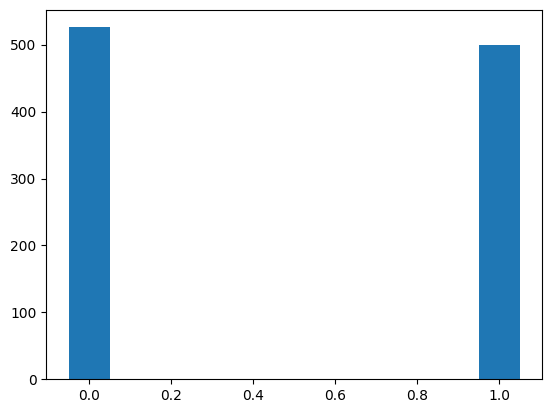

In [5]:
# target plot
plt.bar(df['target'].unique(), df['target'].value_counts(), width=0.1)

## Train/Test Split
- Divide the data into two parts, train and test. Assign `70%` of the data to the train section.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.iloc[:,:-1]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Classification Using Regression

Using a regression model to predict whether patient is likely to get heart desease or not.

- print also the mean_squared_error between real-valued number of regression output and true label.
- How do you decide whether a patient is likely to get heart desease based on the output of the model which is a real-valued number? 

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

meanS = mean_squared_error(y_pred, y_test)
print(meanS)

0.18506493506493507


- Compute accuracy score

In [9]:
accuracy_score(y_pred, y_test)

0.814935064935065


## Over-fitting/Under-fitting - low training sample size

The goal of this section is to explore the relationship between sample size and overfitting in a classification problem. In this code, we randomly select subsets of the training data with various sample sizes and train a linear classifier on each subset. Then, we evaluate the performance of each model on a test set and record the accuracy score. By plotting the accuracy scores against the sample sizes, we can observe how the accuracy changes as we increase the size of the training set.




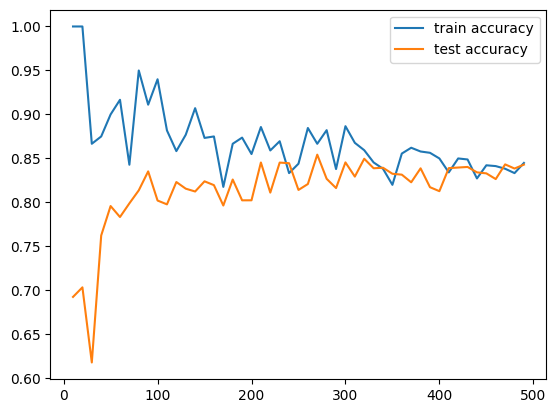

In [26]:

# Define the list of sample sizes to test
sample_sizes = [10 * i for i in range(1, 50)]

# Define an empty list to store the accuracy scores
train_accuracy = []
test_accuracy = []

for sample_size in sample_sizes:
    
    # Randomly select sample_size number of data points from the training set
    X = df.iloc[:,:-1]
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=sample_size)
    
    # Train a linear classifier on the subset of data
    model = LinearRegression().fit(X_train, y_train)
    
    # Make predictions on the test set and train set and calculate the accuracy score
    y_pred_train = model.predict(X_train)
    y_pred_train = np.where(y_pred_train > 0.5, 1, 0)

    y_pred_test = model.predict(X_test)
    y_pred_test = np.where(y_pred_test > 0.5, 1, 0) 

    train_accuracy.append(accuracy_score(y_pred_train, y_train))
    test_accuracy.append(accuracy_score(y_pred_test, y_test))   

    
# Plot the train and test accuracy scores as a function of sample size
plt.plot(sample_sizes, train_accuracy)
plt.plot(sample_sizes, test_accuracy)
plt.legend(['train accuracy', 'test accuracy'])

- Do you see any overfitting or under fitting? Try to explain the result.

## Over-fitting/Under-fitting - Model complexity
In this code, we first split the dataset into training and testing sets, and then define a range of model complexity to explore. We loop over the degrees of complexity and fit a linear regression model to the polynomial features up to the current degree. We then evaluate the performance of the model on the training and testing sets, and record the accuracy scores for each degree of complexity. Finally, we plot the training and testing accuracy as a function of model complexity.

By comparing the training and testing accuracy, we can evaluate the effect of model complexity on overfitting. If the training accuracy is high and the testing accuracy is low, this indicates that the model is overfitting to the training data and is not generalizing well to new data. If both the training and testing accuracy are low, this indicates that the model is underfitting and is too simple to capture the underlying pattern in the data. We can use this information to select an appropriate degree of complexity for our linear regression model that achieves good performance without overfitting.


### Polynomial Regression

Curvy data can be modeled by a polynomial regression of degree $n$.

**A simple polynomial with degree 3:**

$\hat{Y} = \Theta_0 + \Theta_1X + \Theta_2 X^2 + \Theta3 X^3$

Even though the relationship between $X$ and $Y$ is non-linear, a polynomial regression can still be expressed as a linear regression!
<br>
if we declare 3 new independent variables as...

$X_1 = X, $
$X_2 = X^2, $
$X_3 = X^3$

...the model can be converted to a multiple linear regression using these new variables!

$\hat{Y} = \Theta_0 + \Theta_1X_1 + \Theta_2X_2 + \Theta_3X_3$

Now we can treat it like multiple linear regression!

### Polynomial Features


```PolynomialFeatures(degree=n)``` function in sk-learn generates a matrix consisting of all polynomial combinations of the features with degrees less than or equal to the specified degree. 

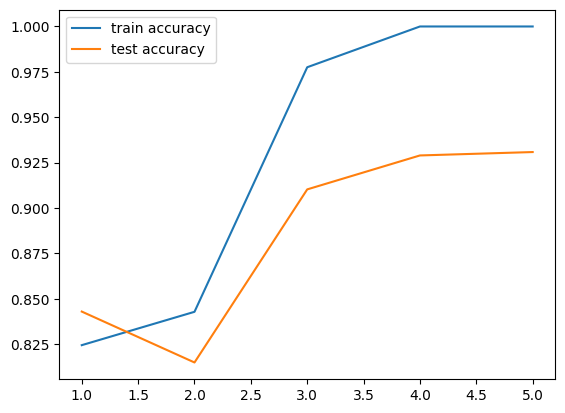

In [54]:
max_degrees = 5
from sklearn.preprocessing import PolynomialFeatures

# Initialize lists to store the training and testing accuracy for each degree of complexity
train_accuracy = []
test_accuracy = []
degrees = range(1, max_degrees+1)

# Loop over the degrees of complexity and fit a linear regression model to the training data
for degree in degrees:

    # Generate polynomial features up to the current degree
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit a linear regression model to the polynomial features
    model = LinearRegression().fit(X_train_poly, y_train)

    # Evaluate the performance of the model on the training and testing sets
    y_pred_train_poly = model.predict(X_train_poly)
    y_pred_train_poly = np.where(y_pred_train_poly > 0.5, 1, 0)

    y_pred_test_poly = model.predict(X_test_poly)
    y_pred_test_poly = np.where(y_pred_test_poly > 0.5, 1, 0) 

    train_accuracy.append(accuracy_score(y_pred_train_poly, y_train))
    test_accuracy.append(accuracy_score(y_pred_test_poly, y_test))  

# Plot the training and testing accuracy as a function of model complexity
plt.plot(degrees, train_accuracy)
plt.plot(degrees, test_accuracy)
plt.legend(['train accuracy', 'test accuracy'])

- Do you see any overfitting or under fitting? Try to explain the result.

## Over-fitting/Under-fitting - Number of features
This code demonstrates how to randomly select a subset of features from a classification dataset and evaluate the performance of a linear regression model on the selected features. By evaluating the performance of the model on multiple random feature subsets, we can gain insight into which subsets of features are most informative for the classification task.

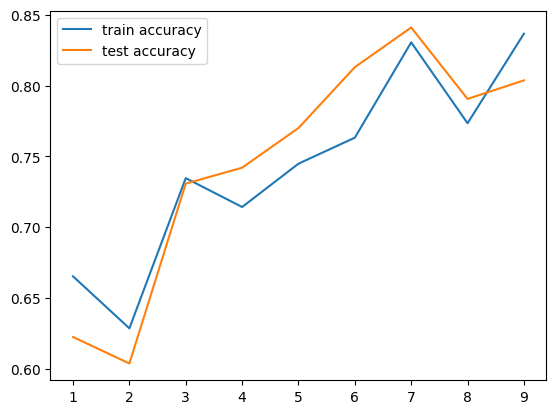

In [55]:
num_features = [i for i in range(1, 10)]

train_accuracy = []
test_accuracy = []

for i in num_features:
    # Select a random subset of features
    data = df.drop('target', axis=1).sample(n=i, axis=1)
    X_newf = data
    y_newf = df['target']
    X_train_newf, X_test_newf, y_train_newf, y_test_newf = train_test_split(X_newf, y_newf, train_size=sample_size)  

    # Evaluate the performance of a linear regression model with different polynomial degree
    model = LinearRegression().fit(X_train_newf, y_train_newf)
    
    # Evaluate the model on the training and testing data
    y_pred_train_newf = model.predict(X_train_newf)
    y_pred_train_newf = np.where(y_pred_train_newf > 0.5, 1, 0)

    y_pred_test_newf = model.predict(X_test_newf)
    y_pred_test_newf = np.where(y_pred_test_newf > 0.5, 1, 0) 

    train_accuracy.append(accuracy_score(y_pred_train_newf, y_train_newf))
    test_accuracy.append(accuracy_score(y_pred_test_newf, y_test_newf))
    
# Plot the training and testing accuracy as a function of number of features
plt.plot(num_features, train_accuracy)
plt.plot(num_features, test_accuracy)
plt.legend(['train accuracy', 'test accuracy'])

- Do you see any overfitting or under fitting? Try to explain the result.

## Implementing K-fold cross validation
The problem with train/test split:

By selecting a different portion of the dataset for training, the accuracy of the model also changes, so we are not able to achieve a fixed accuracy for the model.
To fix this, we can train many models on different portions and simply average their test accuracies!
This method is called Cross-Validation. 

K-fold Cross-Validation is a popular method that can be used in many cases.
if we have K equals for 4 folds, then we split up the dataset as shown below.

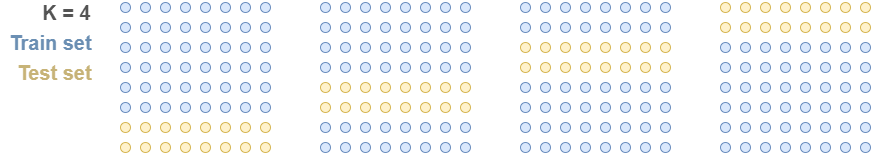

In each fold, a different 25% portion of the dataset is used for testing and the rest is used for training. We calculate accuracy in each setting and finally, the result of all folds are averaged. This gives us a more consistent out-of-sample accuracy.

So in this section we want to implement cross validation from scratch

In [56]:
# Define the number of folds for k-fold cross-validation
k=4

# Split the data into k-folds

acc_scores = []
for i in range(k):

    # Split the data into training and testing sets for this fold
    X_test_fold = X[i*k:(i+1)*k]
    y_test_fold = y[i*k:(i+1)*k]
    X_train_fold = np.concatenate([X[:i*k], X[(i+1)*k:]])
    y_train_fold = np.concatenate([y[:i*k], y[(i+1)*k:]])

    # Fit a linear regression model to the training set
    model = LinearRegression().fit(X_train_fold, y_train_fold)
    
    # Predict the classes of the test set and compute the accuracy score
    y_pred_test_fold = model.predict(X_test_fold)
    y_pred_test_fold = np.where(y_pred_test_fold > 0.5, 1, 0) 
    
    acc_scores.append(accuracy_score(y_pred_test_fold, y_test_fold))

# Compute the mean and standard deviation of accuracy score

mean_accuracy = np.mean(acc_scores)
std_accuracy = np.std(acc_scores)

print('mean: ', mean_accuracy)
print('std: ', std_accuracy)

mean:  0.9375
std:  0.10825317547305482


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lin


<hr>
<hr>

# Afternoon Hands-On 15:45 to 18:00

<hr>
<hr>


## SVM

### Training
- Use svm.SVC from sklearn to train the model using training data


In [57]:
from sklearn import svm

model = svm.SVC().fit(X_train, y_train)

### Prediction and Evaluation
- Compute accuracy score

In [62]:
y_pred_svm = model.predict(X_test)

accuracy_score(y_pred_svm, y_test)

0.7252336448598131

- Which classifier performs better between SVM and a linear classifier?

To determine this, we can evaluate our classifier using cross-validation. Instead of implementing cross-validation from scratch, let's use the cross_val_score function from the Scikit-learn library.

In [70]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=8)
print(np.mean(scores))

0.7102637475775193


### Hyperparameter search

The SVM classifier has a parameter called kernel which determines the type of kernel function used in SVM. 

There are different kernels available, including `linear`, `poly`, `rbf`, and `sigmoid`. 

- To determine the best model, we can train SVM models with these different kernels and evaluate their performance using cross-validation.

In [76]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels: 
  # train SVM with different kernels and print mean and std of cross validation scores for each kernel
  model = svm.SVC(kernel=kernel)
  scores = cross_val_score(model, X, y, cv=8)

  print(kernel, "mean:", np.mean(scores))
  print(kernel, "std:",np.std(scores))
  print()

linear mean: 0.8331667877906976
linear std: 0.02734657926672717

poly mean: 0.7170618338178294
poly std: 0.04738030913848733

rbf mean: 0.7102637475775193
rbf std: 0.02859526867752966

sigmoid mean: 0.5238841448643411
sigmoid std: 0.019139128556234074



Which of the models performed better? Can you provide an explanation?


Additionally, Scikit-learn provides a useful feature called `GridSearchCV` that can help find the best model based on different hyperparameters. 

You can run the code below to see if it is consistent with the results obtained from the previous models. 

- Take some time to understand the code.

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
grid_search = GridSearchCV(model, param_grid={'kernel': kernels}, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print(f'Best parameters for SVM: { grid_search.best_params_} with score: {grid_search.best_score_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for SVM: {'kernel': 'linear'} with score: 0.8142857142857143


## Over-fitting/Under-fitting - low training sample size

Similarly to the linear classifier, let's explore how the accuracy of the SVM model is affected by the size of the training dataset. 

- Are there any noticeable differences between the results of the SVM and the linear classifier?


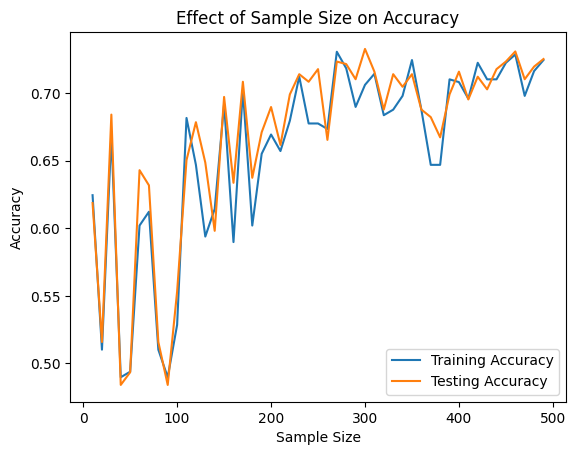

In [81]:
# Define the list of sample sizes to test
sample_sizes = [10 * i for i in range(1, 50)]

# Define an empty list to store the accuracy scores
train_accuracy = []
test_accuracy = []

for sample_size in sample_sizes:
    # Randomly select sample_size number of data points from the training set
    indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
    X_train_subset = X_train.iloc[indices]
    y_train_subset = y_train.iloc[indices]
    
    # Train a linear tree classifier on the subset of data
    model = svm.SVC().fit(X_train_subset, y_train_subset)
    
    # Make predictions on the test set and calculate the accuracy score
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

    
# Plot the accuracy scores as a function of sample size

plt.plot(sample_sizes, train_accuracy, label="Training Accuracy")
plt.plot(sample_sizes, test_accuracy , label="Testing Accuracy")
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
plt.title('Effect of Sample Size on Accuracy')
plt.legend()
plt.show()

## Challenge (Bonus)


Let's attempt to implement SVM from scratch using only NumPy. 

We have provided some of the code for you, and you can fill in the missing parts. 

- This exercise will help you gain a deeper understanding of how SVM works.

### Steps

1.   First, we import NumPy

2.   We define a class called SVM that represents our SVM model. The constructor takes three hyperparameters: the learning rate, lambda (the regularization parameter), and the number of iterations for gradient descent.

3. We define a class called SVM that represents our SVM model. The constructor takes three hyperparameters: the learning rate, lambda (the regularization parameter), and the number of iterations for gradient descent.

4. Inside the gradient descent loop, we calculate the margins, which are the product of the labels and the dot product of the samples and the weights, plus the bias. 
- Implement the margin.
<hr>
5. We then calculate the hinge loss, which is the mean of the maximum of 0 and 1 minus the margins, plus the regularization term.
- Implement the loss.
<hr>

6. Next, we calculate the gradients of the loss function with respect to the weights and bias. We use a vectorized implementation of the gradients to speed up the computation.

7. Finally, we update the weights and bias using the gradients and the learning rate.

8. The predict method of the SVM class takes a new set of samples X and returns the predicted labels, which are the sign of the dot product of the samples and the weights, plus the bias.

- Implement prediction method.
<hr>

In [ ]:
import numpy as np


# Define the SVM class
class SVM:
    def __init__(self, learning_rate=0.1, lambda_param=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient descent
        for i in range(self.num_iterations):
            # Calculate margins

            # Calculate loss

            # Calculate gradients
            grads = -(y * (1 - (margins >= 1))) @ X + 2 * self.lambda_param * self.weights
            bias_grad = -np.sum(y * (1 - (margins >= 1)))

            # Update weights and bias
            self.weights -= self.learning_rate * grads
            self.bias -= self.learning_rate * bias_grad

    def predict(self, X):

        # return ...


# Create an SVM object and fit the data

# convert y from 0 and 1 to -1, 1
y_train = np.where(y_train <= 0, -1, 1)
y_test = np.where(y_test <= 0, -1, 1)

svm = SVM()
svm.fit(X_train, y_train)

# Make predictions and calculate accuracy
predictions = svm.predict(X_test)
accuracy = np.mean(predictions == y_test)

print(f"Accuracy: {accuracy}")

- Compare the result between your implementation and sklearn